<a href="https://colab.research.google.com/github/rohithrajsasikumar/NASA-NEAR-EARTH-OBJECT/blob/main/Predicting_Urban_Taxi_Fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/taxi_fare.csv'

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/taxi_fare.csv')


In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [5]:
df.dtypes
df.shape

(212345, 18)

In [6]:
duplicates = df.duplicated()

#Duplicate Rows
duplicate_rows = df[duplicates]
num_duplicates =  duplicates.sum()
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [7]:
# Calculating the trip distance using haversine formula

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

    dlat = lat2-lat1
    dlong= lon2-lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
    c = 2* np.arcsin(np.sqrt(a))
    r = 6371 #Earth radius in KiloMetre
    return c*r

df['trip_distance'] = haversine(df['pickup_latitude'].astype(float),df['pickup_longitude'].astype(float),df['dropoff_latitude'].astype(float),df['dropoff_longitude'].astype(float))

In [8]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','payment_type','VendorID','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge'],axis=1,inplace=True)

In [9]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,total_amount,trip_distance
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1,1,12.35,3.138096
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,1,15.35,4.303331
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,1,63.80,16.600142
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,1,41.62,9.046547
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,3,113.80,20.400022
...,...,...,...,...,...,...
212340,2016-03-01 12:15:37,2016-03-01 12:38:53,1,1,20.16,3.806279
212341,2016-03-01 12:15:37,2016-03-01 12:38:22,1,1,18.30,3.496576
212342,2016-03-01 12:15:37,2016-03-01 12:18:18,1,1,4.80,0.580119
212343,2016-03-01 12:15:38,2016-03-01 12:22:47,2,1,7.80,1.555737


In [10]:
import numpy as np
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['Weekend/Weekday'] = np.where(df['tpep_pickup_datetime'].dt.dayofweek < 5, 'Weekday', 'Weekend')
df['AM_PM'] = df['tpep_pickup_datetime'].dt.strftime('%p')

In [11]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,total_amount,trip_distance,Weekend/Weekday,AM_PM
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1,1,12.35,3.138096,Weekday,AM
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,1,15.35,4.303331,Weekday,AM
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,1,63.80,16.600142,Weekday,AM
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,1,41.62,9.046547,Weekday,AM
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,3,113.80,20.400022,Weekday,AM
...,...,...,...,...,...,...,...,...
212340,2016-03-01 12:15:37,2016-03-01 12:38:53,1,1,20.16,3.806279,Weekday,PM
212341,2016-03-01 12:15:37,2016-03-01 12:38:22,1,1,18.30,3.496576,Weekday,PM
212342,2016-03-01 12:15:37,2016-03-01 12:18:18,1,1,4.80,0.580119,Weekday,PM
212343,2016-03-01 12:15:38,2016-03-01 12:22:47,2,1,7.80,1.555737,Weekday,PM


In [12]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['is_night'] = np.where((df['hour'] >= 22) | (df['hour'] <= 5), "Yes", "No")

In [13]:
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_convert('America/New_York')

In [14]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,total_amount,trip_distance,Weekend/Weekday,AM_PM,hour,is_night
0,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,1,12.35,3.138096,Weekday,AM,0,Yes
1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,1,15.35,4.303331,Weekday,AM,0,Yes
2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,1,63.80,16.600142,Weekday,AM,0,Yes
3,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,1,41.62,9.046547,Weekday,AM,0,Yes
4,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,3,113.80,20.400022,Weekday,AM,0,Yes
...,...,...,...,...,...,...,...,...,...,...
212340,2016-03-01 07:15:37-05:00,2016-03-01 12:38:53,1,1,20.16,3.806279,Weekday,PM,12,No
212341,2016-03-01 07:15:37-05:00,2016-03-01 12:38:22,1,1,18.30,3.496576,Weekday,PM,12,No
212342,2016-03-01 07:15:37-05:00,2016-03-01 12:18:18,1,1,4.80,0.580119,Weekday,PM,12,No
212343,2016-03-01 07:15:38-05:00,2016-03-01 12:22:47,2,1,7.80,1.555737,Weekday,PM,12,No


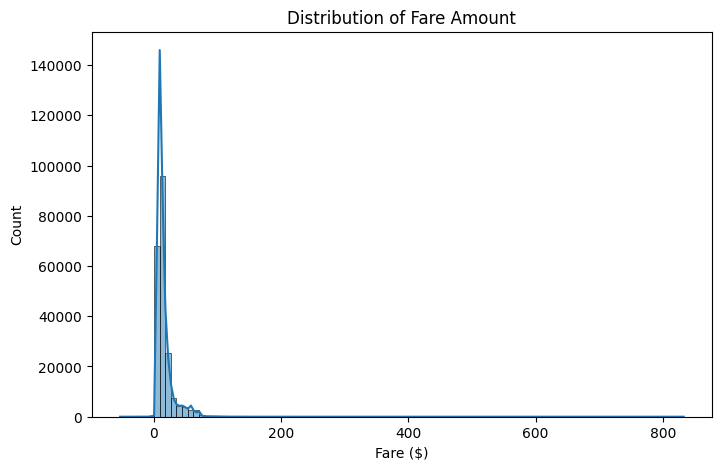

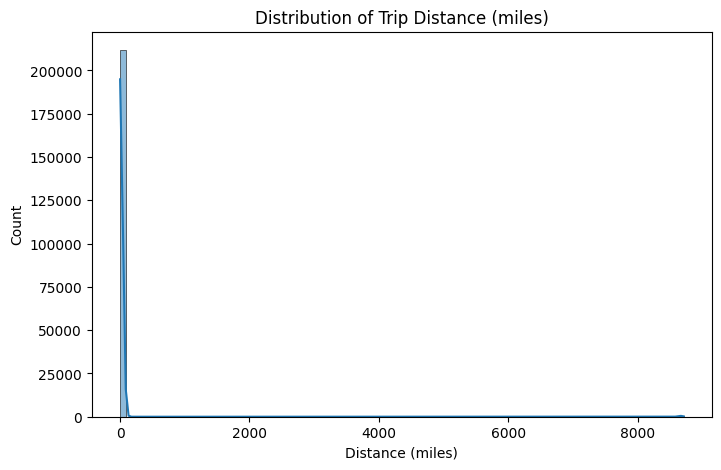

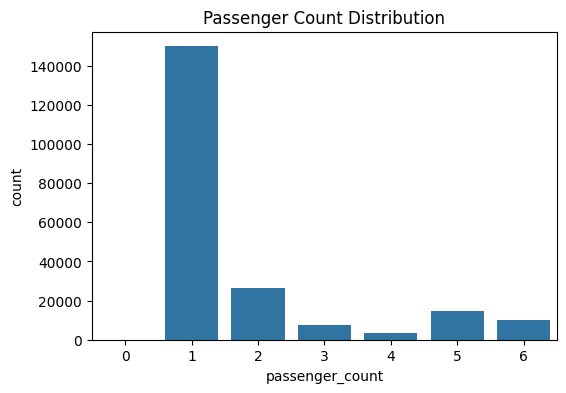

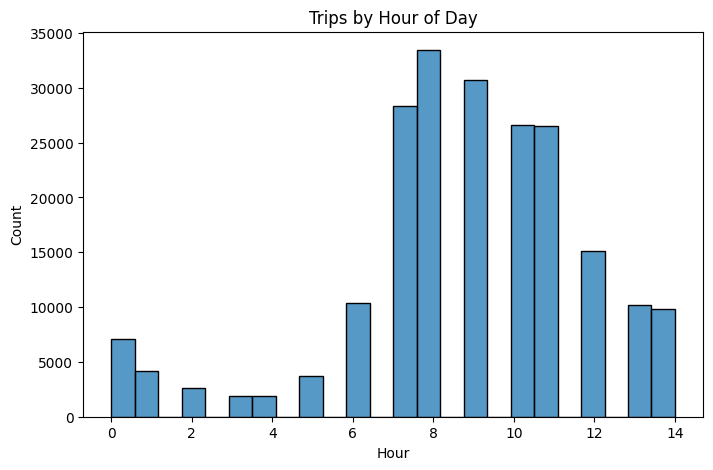

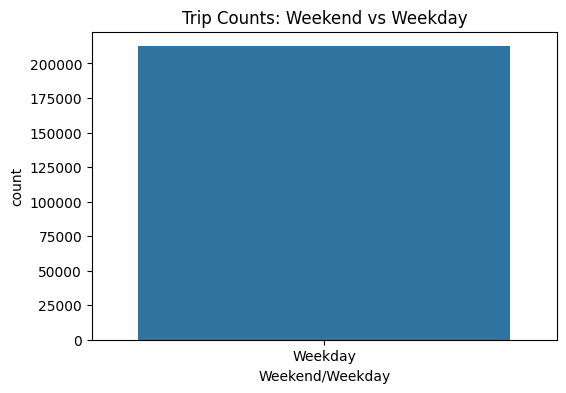

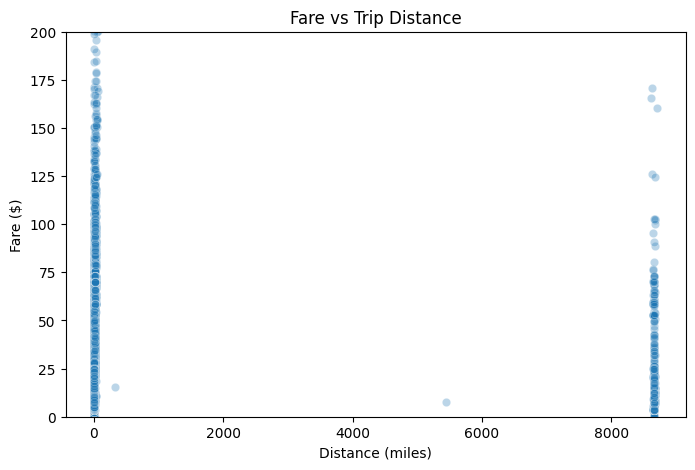

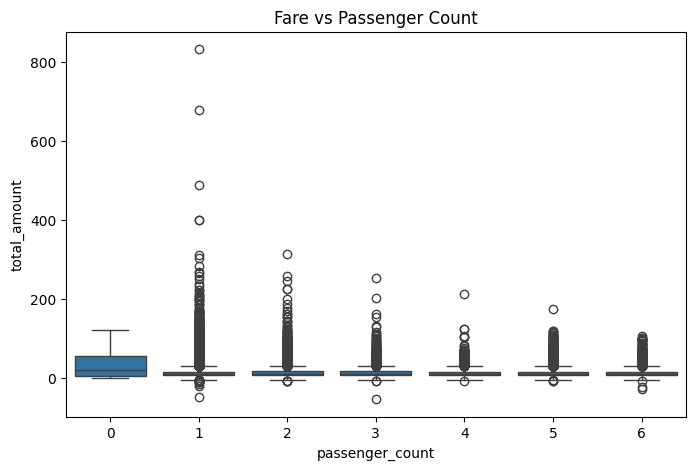

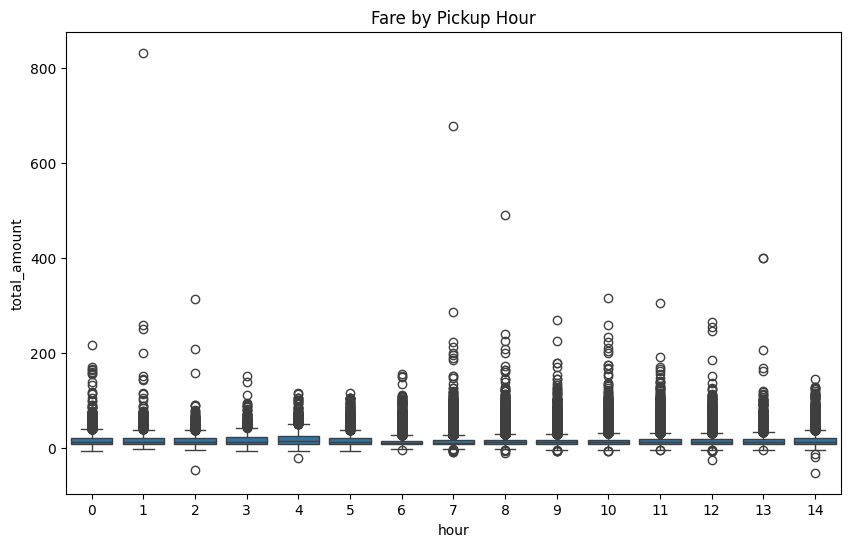

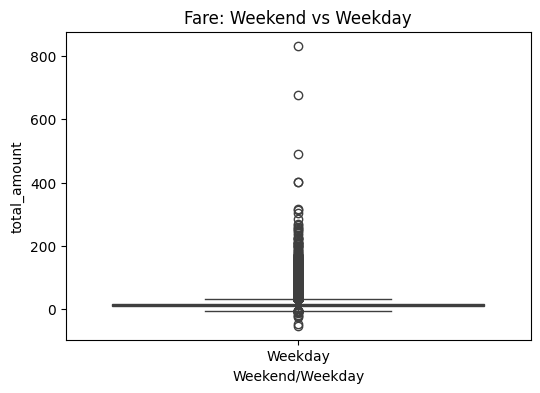

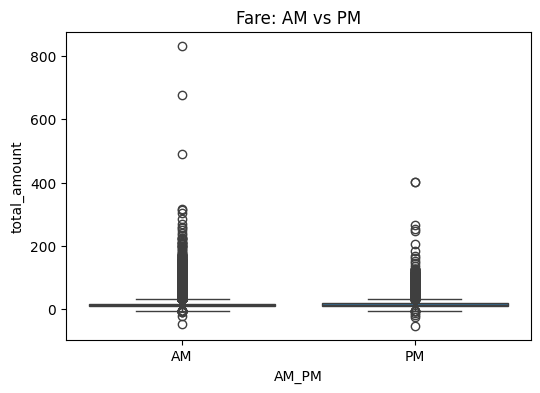

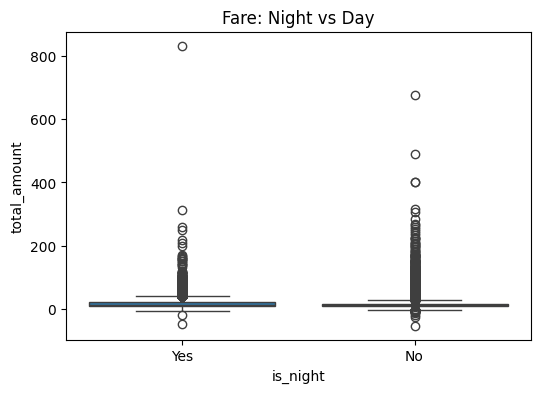

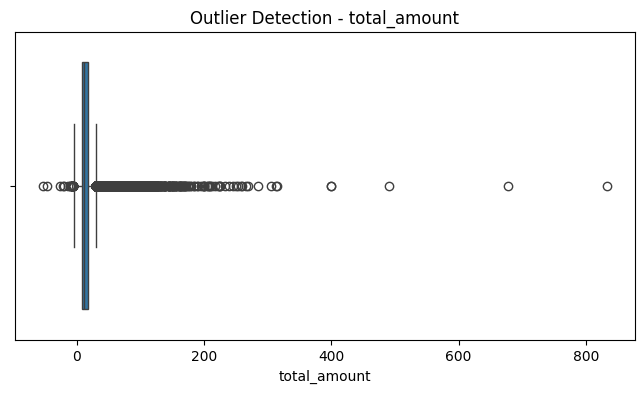

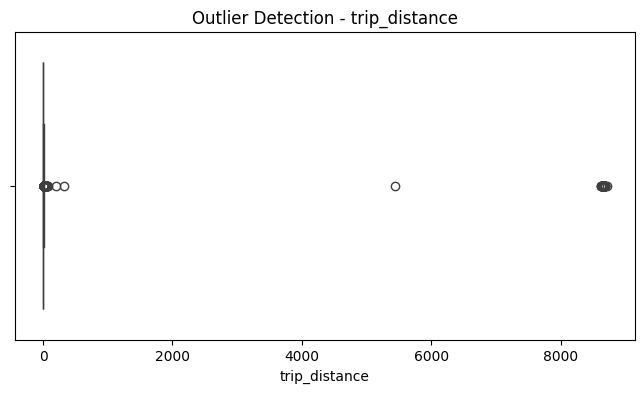

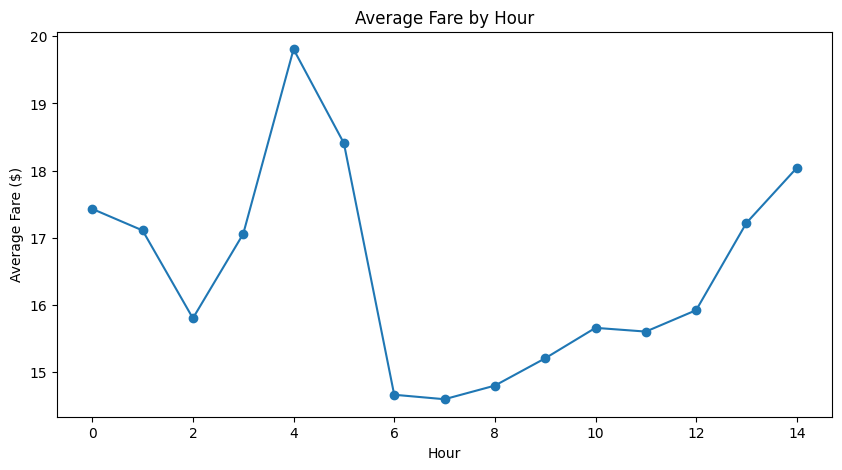

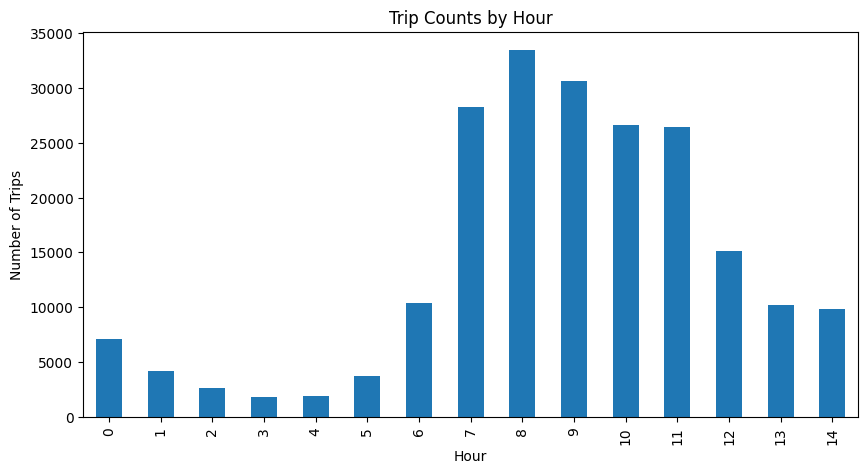

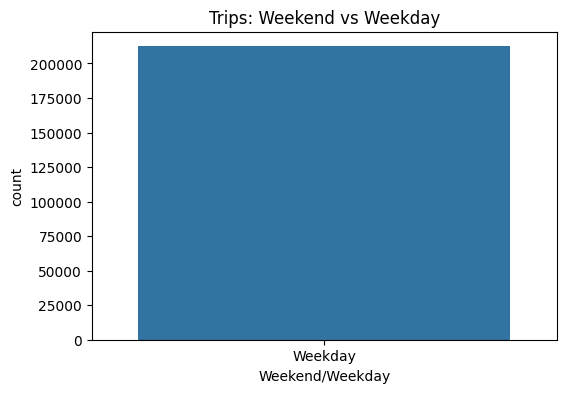

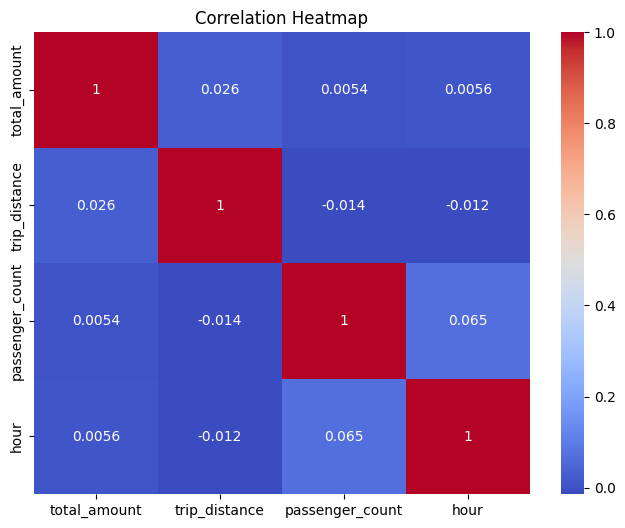

In [15]:
# ===========================
# Exploratory Data Analysis
# ===========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# Univariate Analysis
# ===========================

# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['total_amount'], bins=100, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare ($)")
plt.show()

# Trip distance distribution
plt.figure(figsize=(8,5))
sns.histplot(df['trip_distance'], bins=100, kde=True)
plt.title("Distribution of Trip Distance (miles)")
plt.xlabel("Distance (miles)")
plt.show()

# Passenger count
plt.figure(figsize=(6,4))
sns.countplot(x='passenger_count', data=df)
plt.title("Passenger Count Distribution")
plt.show()

# Pickup hour
plt.figure(figsize=(8,5))
sns.histplot(df['hour'], bins=24)
plt.title("Trips by Hour of Day")
plt.xlabel("Hour")
plt.show()

# Weekend vs Weekday
plt.figure(figsize=(6,4))
sns.countplot(x='Weekend/Weekday', data=df)
plt.title("Trip Counts: Weekend vs Weekday")
plt.show()

# ===========================
# Bivariate Analysis
# ===========================

# Fare vs Distance
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance', y='total_amount', data=df, alpha=0.3)
plt.title("Fare vs Trip Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.ylim(0,200)  # cap outliers visually
plt.show()

# Fare vs Passenger Count
plt.figure(figsize=(8,5))
sns.boxplot(x='passenger_count', y='total_amount', data=df)
plt.title("Fare vs Passenger Count")
plt.show()

# Fare vs Hour
plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='total_amount', data=df)
plt.title("Fare by Pickup Hour")
plt.show()

# Fare: Weekend vs Weekday
plt.figure(figsize=(6,4))
sns.boxplot(x='Weekend/Weekday', y='total_amount', data=df)
plt.title("Fare: Weekend vs Weekday")
plt.show()

# Fare: AM vs PM
plt.figure(figsize=(6,4))
sns.boxplot(x='AM_PM', y='total_amount', data=df)
plt.title("Fare: AM vs PM")
plt.show()

# Fare: Night vs Day
plt.figure(figsize=(6,4))
sns.boxplot(x='is_night', y='total_amount', data=df)
plt.title("Fare: Night vs Day")
plt.show()

# ===========================
# Outlier Detection
# ===========================

for col in ['total_amount','trip_distance']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()

# ===========================
# Time-based Patterns
# ===========================

# Average fare by hour
plt.figure(figsize=(10,5))
df.groupby('hour')['total_amount'].mean().plot(marker='o')
plt.title("Average Fare by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Fare ($)")
plt.show()

# Trips by Hour (demand)
plt.figure(figsize=(10,5))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Trip Counts by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.show()

# Trips by Day Type
plt.figure(figsize=(6,4))
sns.countplot(x='Weekend/Weekday', data=df)
plt.title("Trips: Weekend vs Weekday")
plt.show()

# ===========================
# Correlation Heatmap
# ===========================

plt.figure(figsize=(8,6))
sns.heatmap(df[['total_amount','trip_distance','passenger_count','hour']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# ===========================
# Data Transformation
# ===========================

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer, LabelEncoder

# ---------------------------
# 1. Handle Outliers
# ---------------------------

# --- Using Z-score method ---
z_threshold = 3
numeric_cols = ['total_amount','trip_distance']

df_no_outliers = df[(np.abs(stats.zscore(df[numeric_cols])) < z_threshold).all(axis=1)]

print("Original shape:", df.shape)
print("After Z-score outlier removal:", df_no_outliers.shape)

# --- Using IQR method ---
def remove_outliers_iqr(data, cols):
    cleaned = data.copy()
    for col in cols:
        Q1 = cleaned[col].quantile(0.25)
        Q3 = cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned = cleaned[(cleaned[col] >= lower) & (cleaned[col] <= upper)]
    return cleaned

df_iqr = remove_outliers_iqr(df, numeric_cols)

print("After IQR outlier removal:", df_iqr.shape)

# ---------------------------
# 2. Fix Skewness
# ---------------------------

# Check skewness before
print("\nSkewness before transformation:")
print(df[numeric_cols].skew())

# Apply transformations (log, sqrt, Box-Cox)
df_transformed = df.copy()

# Log transformation (handle zeros by adding 1)
df_transformed['total_amount_log'] = np.log1p(df['total_amount'])
df_transformed['trip_distance_log'] = np.log1p(df['trip_distance'])

# Power Transformer (Box-Cox / Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
df_transformed[['total_amount_pt','trip_distance_pt']] = pt.fit_transform(df[['total_amount','trip_distance']])

print("\nSkewness after Yeo-Johnson:")
print(df_transformed[['total_amount_pt','trip_distance_pt']].skew())

# ---------------------------
# 3. Encode Categorical Variables
# ---------------------------

categorical_cols = ['Weekend/Weekday','AM_PM','is_night']

# Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_transformed[col + '_enc'] = le.fit_transform(df[col])

# One-Hot Encoding (alternative)
df_onehot = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ---------------------------
# Final Check
# ---------------------------
print("\nFinal transformed dataframe shape:", df_transformed.shape)
print("One-hot encoded dataframe shape:", df_onehot.shape)
print(df_transformed.head())

Original shape: (212345, 10)
After Z-score outlier removal: (205814, 10)
After IQR outlier removal: (182235, 10)

Skewness before transformation:
total_amount      5.271134
trip_distance    19.776430
dtype: float64


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



Skewness after Yeo-Johnson:
total_amount_pt    -4.781934
trip_distance_pt    0.016905
dtype: float64

Final transformed dataframe shape: (212345, 17)
One-hot encoded dataframe shape: (212345, 9)
       tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0 2016-02-29 19:00:00-05:00   2016-03-01 00:07:55                1   
1 2016-02-29 19:00:00-05:00   2016-03-01 00:11:06                1   
2 2016-02-29 19:00:00-05:00   2016-03-01 00:31:06                2   
3 2016-02-29 19:00:00-05:00   2016-03-01 00:00:00                3   
4 2016-02-29 19:00:00-05:00   2016-03-01 00:00:00                5   

   RatecodeID  total_amount  trip_distance Weekend/Weekday AM_PM  hour  \
0           1         12.35       3.138096         Weekday    AM     0   
1           1         15.35       4.303331         Weekday    AM     0   
2           1         63.80      16.600142         Weekday    AM     0   
3           1         41.62       9.046547         Weekday    AM     0   
4           3

In [17]:
#Feature Selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe
X = df.drop(columns=['total_amount'])
y = df['total_amount']

# 1. Correlation (for numerical features)
corr = df.corr(numeric_only=True)['total_amount'].sort_values(ascending=False)

In [18]:
# 2. F-test (ANOVA for regression)
f_values, p_values = f_regression(X.select_dtypes(include=[np.number]), y)
f_results = pd.DataFrame({
    'Feature': X.select_dtypes(include=[np.number]).columns,
    'F-Value': f_values,
    'p-Value': p_values
}).sort_values(by="F-Value", ascending=False)

In [19]:
# 3. Mutual Information (works for any type)
mi = mutual_info_regression(X.select_dtypes(include=[np.number]), y)
mi_results = pd.DataFrame({
    'Feature': X.select_dtypes(include=[np.number]).columns,
    'MI Score': mi
}).sort_values(by="MI Score", ascending=False)

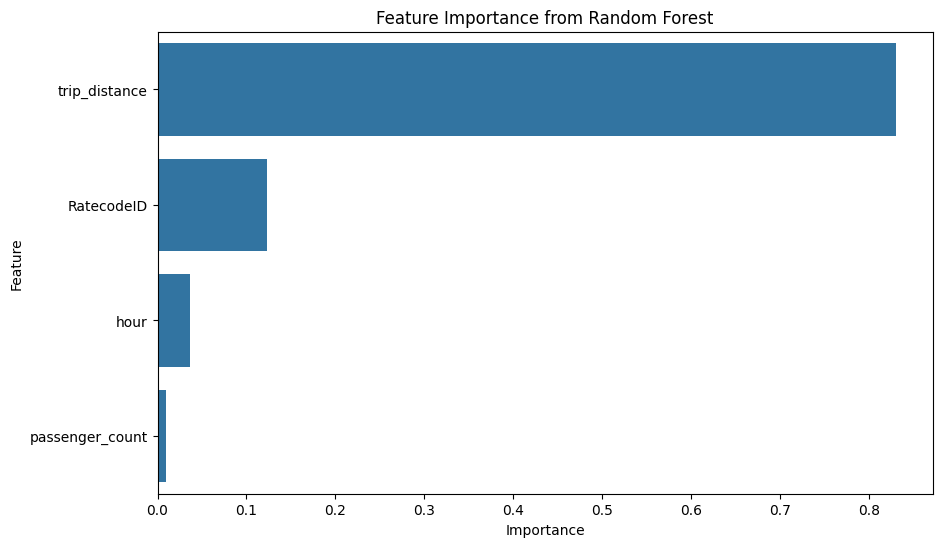

In [20]:
# 4. Feature Importance from Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X.select_dtypes(include=[np.number]), y)
rf_importances = pd.DataFrame({
    'Feature': X.select_dtypes(include=[np.number]).columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot Random Forest Importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=rf_importances)
plt.title("Feature Importance from Random Forest")
plt.show()

In [21]:
# MODEL BUILDING
# Regression Models in Colab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

# ==============================
# 1. Load Data
# ==============================
# Example: Replace this with your dataframe
# df = pd.read_csv("your_file.csv")

# Ensure datetime conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# ==============================
# 2. Feature Engineering
# ==============================
# Extract useful datetime features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday

# Drop original datetime columns
df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# Handle categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [23]:
# ==============================
# 3. Define Features & Target
# ==============================
X = df.drop("total_amount", axis=1)   # target variable is total_amount
y = df["total_amount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# 4. Models
# ==============================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, r2, mse, rmse, mae])

               Model        R²         MSE       RMSE       MAE
0  Linear Regression -0.065541  208.702483  14.446539  8.016495
1              Ridge -0.065539  208.702111  14.446526  8.016496
2              Lasso -0.008442  197.518727  14.054136  8.133163
3      Random Forest  0.797422   39.678035   6.299050  3.069888
4  Gradient Boosting  0.815110   36.213602   6.017774  2.789474


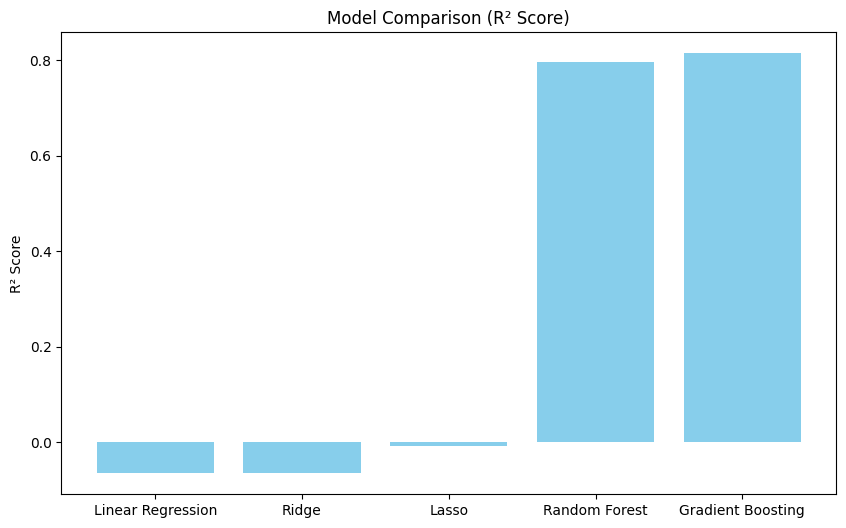

In [24]:
# ==============================
# 5. Results
# ==============================
results_df = pd.DataFrame(results, columns=["Model", "R²", "MSE", "RMSE", "MAE"])
print(results_df)

# ==============================
# 6. Visualization
# ==============================
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["R²"], color="skyblue")
plt.ylabel("R² Score")
plt.title("Model Comparison (R² Score)")
plt.show()

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pickle

# -----------------------------
# 1. Define parameter distribution
# -----------------------------
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 2),
    'max_features': ['sqrt', 'log2']
}

# -----------------------------
# 2. Sample 30% of training data for tuning
# -----------------------------
idx = np.random.choice(len(X_train), size=int(0.3 * len(X_train)), replace=False)
X_sample = X_train[idx]                # works if X_train is numpy array
y_sample = y_train.iloc[idx]           # use iloc for pandas Series

# -----------------------------
# 3. RandomizedSearchCV for hyperparameter tuning
# -----------------------------
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,        # number of parameter settings sampled
    cv=2,             # lighter cross-validation for speed
    n_jobs=2,         # parallel jobs (2 is safe for Colab)
    random_state=42,
    scoring='r2',
    verbose=2
)

random_search.fit(X_sample, y_sample)

# -----------------------------
# 4. Best model after tuning
# -----------------------------
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# -----------------------------
# 5. Evaluate on full test set
# -----------------------------
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nTest Set Performance:")
print(f"R2 Score       : {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# -----------------------------
# 6. Save the best model (Pickle format)
# -----------------------------
with open("best_random_forest.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("\n✅ Best model saved as 'best_random_forest.pkl'")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'n_estimators': np.int64(250), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(3), 'max_features': 'log2', 'max_depth': 10}
Best CV Score: 0.8197084389565472

Test Set Performance:
R2 Score       : 0.8034
Mean Squared Error (MSE): 38.5160
Mean Absolute Error (MAE): 2.9520

✅ Best model saved as 'best_random_forest.pkl'


In [29]:
!pip install streamlit streamlit_option_menu  # installing streamlit and streamlit_option_menu packages

  Using cached streamlit-1.49.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.9 MB/s eta 0:00:00


In [31]:
# @title Setup code
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

--2025-09-04 17:43:30--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.8.1/cloudflared-linux-amd64 [following]
--2025-09-04 17:43:30--  https://github.com/cloudflare/cloudflared/releases/download/2025.8.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/0593a2fc-d1d2-46e1-aaac-c8f6bd891eca?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-04T18%3A37%3A45Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-04T1

In [32]:
%%writefile app.py

import streamlit as st
import pickle
import numpy as np
import pandas as pd
from datetime import datetime

# ----------------------------
# Load the trained model
# ----------------------------
with open("best_random_forest.pkl", "rb") as f:
    model = pickle.load(f)

st.set_page_config(page_title="Taxi Fare Prediction", page_icon="🚖")
st.title("🚖 NYC Taxi Fare Prediction App")

st.markdown("### Enter trip details below to predict the fare amount:")

# ----------------------------
# Input fields for user
# ----------------------------
pickup_longitude = st.number_input("Pickup Longitude", value=-73.9855, format="%.6f")
pickup_latitude = st.number_input("Pickup Latitude", value=40.7484, format="%.6f")
dropoff_longitude = st.number_input("Dropoff Longitude", value=-73.9850, format="%.6f")
dropoff_latitude = st.number_input("Dropoff Latitude", value=40.7580, format="%.6f")
passenger_count = st.slider("Passenger Count", 1, 6, 1)

# Date & Time input
pickup_datetime = st.datetime_input("Pickup Date & Time", datetime.now())

# Extract datetime features
pickup_hour = pickup_datetime.hour
pickup_day = pickup_datetime.day
pickup_weekday = pickup_datetime.weekday()  # 0 = Monday, 6 = Sunday

# ----------------------------
# Predict button
# ----------------------------
if st.button("Predict Fare"):
    # Ensure feature order matches training
    if hasattr(model, "feature_names_in_"):
        feature_names = model.feature_names_in_
    else:
        # If not available, define manually in same order as training
        feature_names = [
            "pickup_longitude",
            "pickup_latitude",
            "dropoff_longitude",
            "dropoff_latitude",
            "passenger_count",
            "pickup_hour",
            "pickup_day",
            "pickup_weekday"
        ]

    # Create input dataframe with correct order
    input_data = pd.DataFrame([[
        pickup_longitude,
        pickup_latitude,
        dropoff_longitude,
        dropoff_latitude,
        passenger_count,
        pickup_hour,
        pickup_day,
        pickup_weekday
    ]], columns=feature_names)

    # Predict fare
    predicted_fare = model.predict(input_data)[0]

    st.success(f"💰 Estimated Fare: **${predicted_fare:.2f}**")

Overwriting app.py


In [33]:
!wget -q -O - ipv4.icanhazip.com   # this command will generate a password for you(copy that)

34.68.19.207


In [34]:
! streamlit run app.py & npx localtunnel --port 8501  # replace the file name accordingly

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇

⠏⠋⠙⠹⠸⠼⠴⠦your url is: https://busy-tigers-hear.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.68.19.207:8501

────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.12/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  128 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.12/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:669 in code_to_exec                                                               
                                                                                        
  /content/app.py:29 in <module>                                                        
                                         

In [28]:
# @title Setup code
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

ERROR: Operation cancelled by user
--2025-09-04 17:39:44--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.8.1/cloudflared-linux-amd64 [following]
--2025-09-04 17:39:44--  https://github.com/cloudflare/cloudflared/releases/download/2025.8.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/0593a2fc-d1d2-46e1-aaac-c8f6bd891eca?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-04T18%3A35%3A15Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9

In [ ]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd
from datetime import datetime

# ----------------------------
# Load the trained model
# ----------------------------
with open("best_random_forest.pkl", "rb") as f:
    model = pickle.load(f)

st.set_page_config(page_title="Taxi Fare Prediction", page_icon="🚖")
st.title("🚖 NYC Taxi Fare Prediction App")

st.markdown("### Enter trip details below to predict the fare amount:")

# ----------------------------
# Input fields for user
# ----------------------------
pickup_longitude = st.number_input("Pickup Longitude", value=-73.9855, format="%.6f")
pickup_latitude = st.number_input("Pickup Latitude", value=40.7484, format="%.6f")
dropoff_longitude = st.number_input("Dropoff Longitude", value=-73.9850, format="%.6f")
dropoff_latitude = st.number_input("Dropoff Latitude", value=40.7580, format="%.6f")
passenger_count = st.slider("Passenger Count", 1, 6, 1)

# Date & Time input
pickup_datetime = st.datetime_input("Pickup Date & Time", datetime.now())

# Extract datetime features
pickup_hour = pickup_datetime.hour
pickup_day = pickup_datetime.day
pickup_weekday = pickup_datetime.weekday()  # 0 = Monday, 6 = Sunday

# ----------------------------
# Predict button
# ----------------------------
if st.button("Predict Fare"):
    # Ensure feature order matches training
    if hasattr(model, "feature_names_in_"):
        feature_names = model.feature_names_in_
    else:
        # If not available, define manually in same order as training
        feature_names = [
            "pickup_longitude",
            "pickup_latitude",
            "dropoff_longitude",
            "dropoff_latitude",
            "passenger_count",
            "pickup_hour",
            "pickup_day",
            "pickup_weekday"
        ]

    # Create input dataframe with correct order
    input_data = pd.DataFrame([[
        pickup_longitude,
        pickup_latitude,
        dropoff_longitude,
        dropoff_latitude,
        passenger_count,
        pickup_hour,
        pickup_day,
        pickup_weekday
    ]], columns=feature_names)

    # Predict fare
    predicted_fare = model.predict(input_data)[0]

    st.success(f"💰 Estimated Fare: **${predicted_fare:.2f}**")

2025-09-01 19:20:07.621 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 19:20:07.626 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 19:20:07.736 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-01 19:20:07.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 19:20:07.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 19:20:07.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 19:20:07.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

AttributeError: module 'streamlit' has no attribute 'datetime_input'